#### Install yfinance

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 669 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# Forecasting Stocks from Yahoo Finance with Prophet

In [2]:
import yfinance as yf

# berkshire hathaway inc. (b stock)
brk = yf.Ticker('BRK-B')

hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-05-09,22.200001,24.400000,22.200001,23.200001,4290000,0,0.0
1996-05-10,24.000000,24.200001,23.600000,24.000000,1060000,0,0.0
1996-05-13,24.000000,24.100000,23.299999,23.900000,700000,0,0.0
1996-05-14,24.000000,24.100000,23.100000,23.600000,310000,0,0.0
1996-05-15,23.600000,23.700001,23.000000,23.200001,545000,0,0.0
...,...,...,...,...,...,...,...
2022-08-23,288.850006,291.640015,288.149994,289.649994,2592100,0,0.0
2022-08-24,290.000000,294.000000,289.459991,293.519989,3266100,0,0.0
2022-08-25,293.709991,298.480011,292.829987,298.130005,3463700,0,0.0


In [3]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
6617,2022-08-23,289.649994
6618,2022-08-24,293.519989
6619,2022-08-25,298.130005
6620,2022-08-26,289.959991
6621,2022-08-29,287.450012


In [8]:
from prophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrl0it3i/h9uevhcp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrl0it3i/2ycom0wi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50291', 'data', 'file=/tmp/tmpdrl0it3i/h9uevhcp.json', 'init=/tmp/tmpdrl0it3i/2ycom0wi.json', 'output', 'file=/tmp/tmp5kadbu0d/prophet_model-20220829211952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:19:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:19:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
6980,2023-08-23,316.934126,300.315867,332.007928
6981,2023-08-24,316.917972,300.379699,332.303476
6982,2023-08-25,317.064733,301.501080,332.643451
6983,2023-08-26,319.793178,303.494062,336.361371
6984,2023-08-27,319.800048,303.985590,335.083640
6985,2023-08-28,316.856931,300.978102,333.129455
6986,2023-08-29,316.967740,300.182408,332.375966


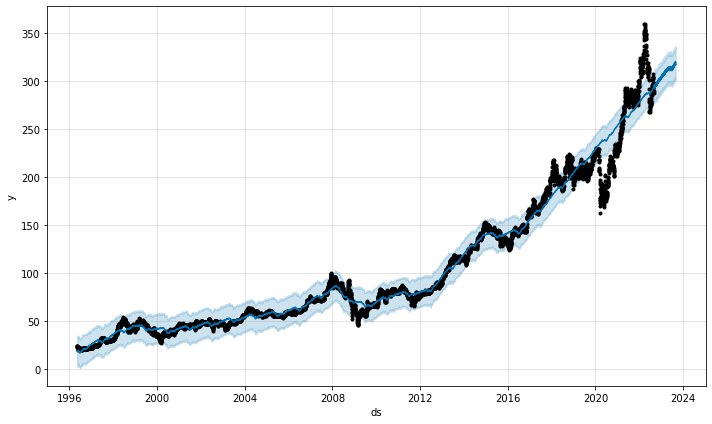

In [10]:
m.plot(forecast);

## Make it a Function

In [11]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrl0it3i/4jfe88fo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrl0it3i/eg5bykpb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72112', 'data', 'file=/tmp/tmpdrl0it3i/4jfe88fo.json', 'init=/tmp/tmpdrl0it3i/eg5bykpb.json', 'output', 'file=/tmp/tmptcdqg_aa/prophet_model-20220829212111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-05,13.777693,12.464419,14.342552,13.777693,13.777693,-0.346175,-0.346175,-0.346175,-0.022136,-0.022136,-0.022136,-0.324039,-0.324039,-0.324039,0.0,0.0,0.0,13.431518
1,2017-05-08,13.770047,12.556389,14.408331,13.770047,13.770047,-0.298039,-0.298039,-0.298039,-0.010112,-0.010112,-0.010112,-0.287928,-0.287928,-0.287928,0.0,0.0,0.0,13.472008
2,2017-05-09,13.767498,12.520164,14.351277,13.767498,13.767498,-0.281420,-0.281420,-0.281420,-0.010659,-0.010659,-0.010659,-0.270761,-0.270761,-0.270761,0.0,0.0,0.0,13.486078
3,2017-05-10,13.764949,12.617121,14.426885,13.764949,13.764949,-0.267468,-0.267468,-0.267468,-0.015947,-0.015947,-0.015947,-0.251521,-0.251521,-0.251521,0.0,0.0,0.0,13.497481
4,2017-05-11,13.762400,12.570048,14.447734,13.762400,13.762400,-0.249490,-0.249490,-0.249490,-0.018948,-0.018948,-0.018948,-0.230543,-0.230543,-0.230543,0.0,0.0,0.0,13.512910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,2023-02-21,18.446921,17.777725,20.535953,17.490635,19.488928,0.605571,0.605571,0.605571,-0.010659,-0.010659,-0.010659,0.616230,0.616230,0.616230,0.0,0.0,0.0,19.052492
1515,2023-02-22,18.443866,17.682242,20.423040,17.466054,19.495023,0.604303,0.604303,0.604303,-0.015947,-0.015947,-0.015947,0.620250,0.620250,0.620250,0.0,0.0,0.0,19.048168
1516,2023-02-23,18.440811,17.635724,20.427486,17.441504,19.502420,0.598650,0.598650,0.598650,-0.018948,-0.018948,-0.018948,0.617598,0.617598,0.617598,0.0,0.0,0.0,19.039461
1517,2023-02-24,18.437756,17.691034,20.461764,17.422705,19.512182,0.585614,0.585614,0.585614,-0.022136,-0.022136,-0.022136,0.607750,0.607750,0.607750,0.0,0.0,0.0,19.023369


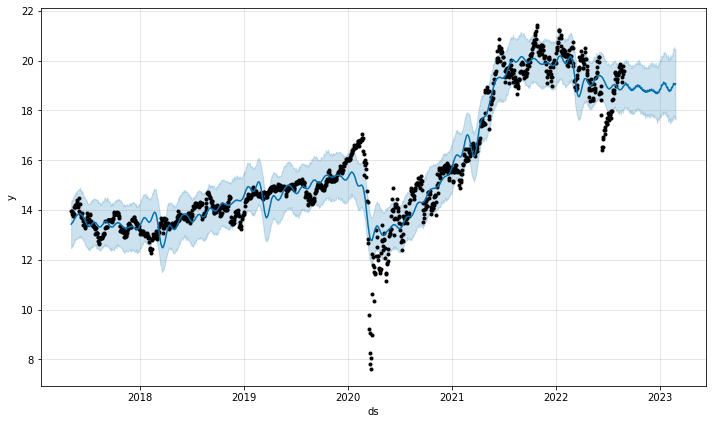

In [12]:
# kkr real estate finance trust
make_forecast('KREF', 180)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrl0it3i/ssr6z5o1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrl0it3i/mmvflxr4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72923', 'data', 'file=/tmp/tmpdrl0it3i/ssr6z5o1.json', 'init=/tmp/tmpdrl0it3i/mmvflxr4.json', 'output', 'file=/tmp/tmp9vj4mbv5/prophet_model-20220829212121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:21:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2710,2024-08-24,44.595814,-15.123933,102.849292,-11.649198,103.578730,-2.414909,-2.414909,-2.414909,-2.435338,-2.435338,-2.435338,0.020429,0.020429,0.020429,0.0,0.0,0.0,42.180905
2711,2024-08-25,44.603023,-14.461235,99.890412,-11.710042,103.703736,-2.382062,-2.382062,-2.382062,-2.435340,-2.435340,-2.435340,0.053278,0.053278,0.053278,0.0,0.0,0.0,42.220961
2712,2024-08-26,44.610232,-10.935601,104.414126,-11.748189,103.828400,0.970977,0.970977,0.970977,0.897202,0.897202,0.897202,0.073775,0.073775,0.073775,0.0,0.0,0.0,45.581209
2713,2024-08-27,44.617441,-11.437027,104.375345,-11.780179,103.953063,1.053477,1.053477,1.053477,0.971431,0.971431,0.971431,0.082046,0.082046,0.082046,0.0,0.0,0.0,45.670918
2714,2024-08-28,44.624649,-11.675590,104.603535,-11.888327,104.077727,1.028370,1.028370,1.028370,0.949792,0.949792,0.949792,0.078578,0.078578,0.078578,0.0,0.0,0.0,45.653019


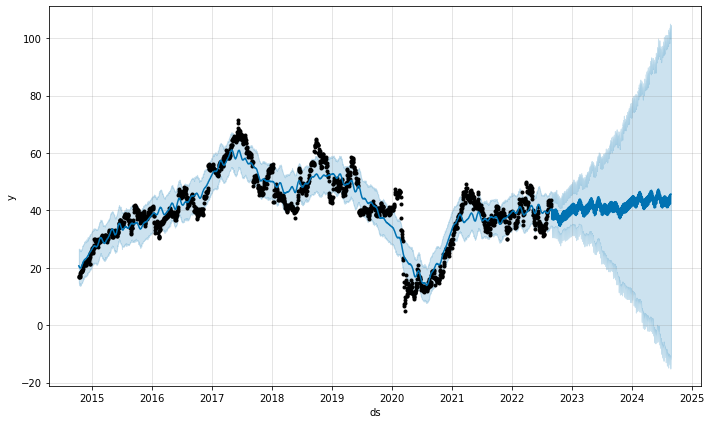

In [13]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrl0it3i/p19qhg7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrl0it3i/c2y0xv3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92166', 'data', 'file=/tmp/tmpdrl0it3i/p19qhg7q.json', 'init=/tmp/tmpdrl0it3i/c2y0xv3h.json', 'output', 'file=/tmp/tmp2pvukwfj/prophet_model-20220829212134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1384,2022-08-30,7.224309,2.577802,12.246610
1385,2022-08-31,7.056779,2.000167,11.712739
1386,2022-09-01,6.887809,1.634155,11.963096
1387,2022-09-02,6.885172,2.299717,12.150237
1388,2022-09-03,7.394546,2.745960,12.196521
...,...,...,...,...
1744,2023-08-25,-52.466125,-75.848039,-30.634899
1745,2023-08-26,-52.010697,-74.859895,-30.914417
1746,2023-08-27,-52.204699,-75.425452,-31.998881
1747,2023-08-28,-53.155757,-77.436284,-32.396760


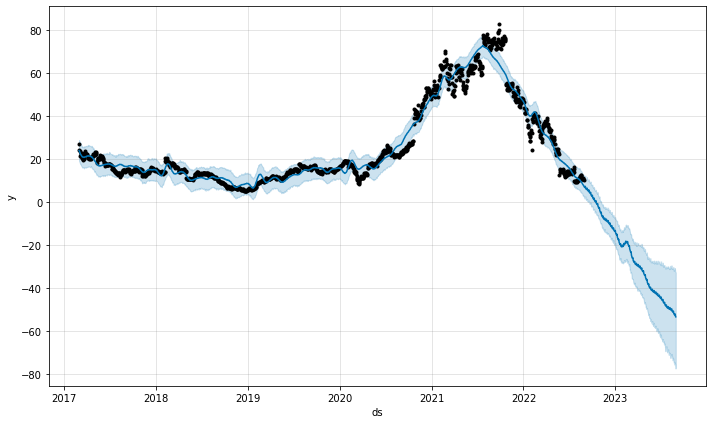

In [14]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast('SNAP', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast